# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base.

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado).

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import probplot
import seaborn as sns
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('/content/previsao_de_renda_II.csv').sample(10000)
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
226052,2015-05-01,3880,F,N,S,0,Empresário,Médio,Casado,Casa,48,3.520548,2.0,2148.27
201226,2015-05-01,13969,M,N,N,1,Assalariado,Médio,Casado,Casa,34,6.956164,3.0,17214.16
116630,2015-03-01,8778,F,N,S,2,Assalariado,Superior completo,Casado,Casa,27,7.410959,4.0,17153.60
668152,2016-02-01,11987,F,N,S,0,Assalariado,Superior completo,Casado,Casa,64,9.183562,2.0,2923.19
597342,2015-12-01,7727,F,N,S,0,Pensionista,Médio,Solteiro,Casa,57,NaN,1.0,3836.87


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 226052 to 269665
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               10000 non-null  object 
 1   index                  10000 non-null  int64  
 2   sexo                   10000 non-null  object 
 3   posse_de_veiculo       10000 non-null  object 
 4   posse_de_imovel        10000 non-null  object 
 5   qtd_filhos             10000 non-null  int64  
 6   tipo_renda             10000 non-null  object 
 7   educacao               10000 non-null  object 
 8   estado_civil           10000 non-null  object 
 9   tipo_residencia        10000 non-null  object 
 10  idade                  10000 non-null  int64  
 11  tempo_emprego          8381 non-null   float64
 12  qt_pessoas_residencia  10000 non-null  float64
 13  renda                  10000 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 1.4+

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

In [3]:
df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)

In [4]:
X = pd.get_dummies(df.drop(columns=['renda', 'data_ref']))
y = df['renda']

In [5]:
X = sm.add_constant(X)

In [6]:
for col in X.select_dtypes(include=['bool']).columns:
    X[col] = X[col].astype(int)

In [7]:
model = sm.OLS(y, X).fit()

In [8]:
residuals = model.resid
fitted_values = model.fittedvalues
predicted = model.predict(X)

# Avaliar a normalidade dos resíduos

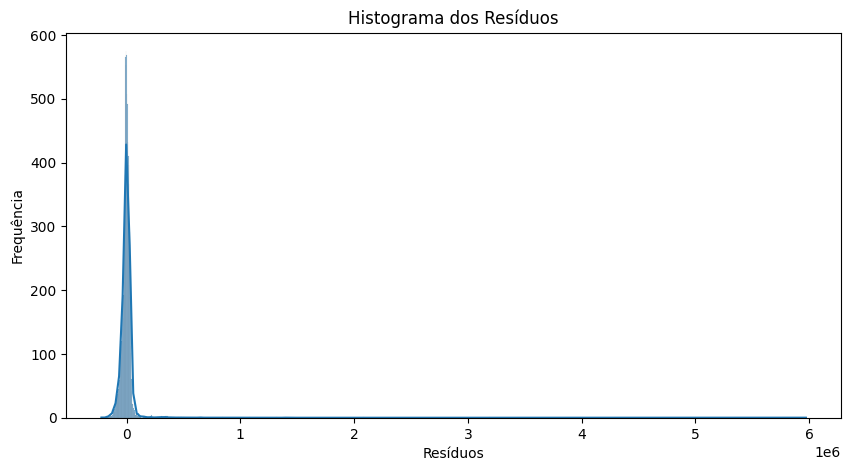

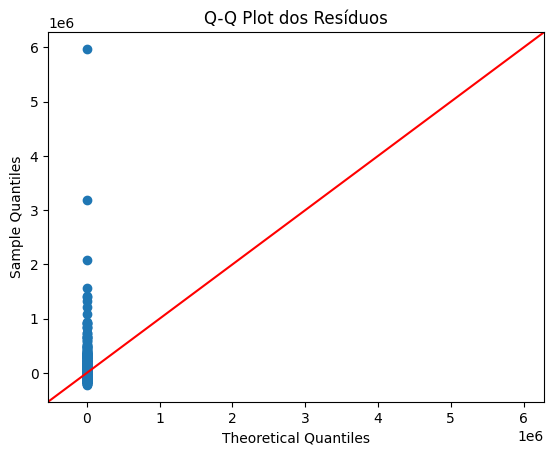

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot dos Resíduos')
plt.show()

Resposta: Sim, os resíduos possuem uma distribuição normal, quase perfeita

# Verificar a independência dos resíduos

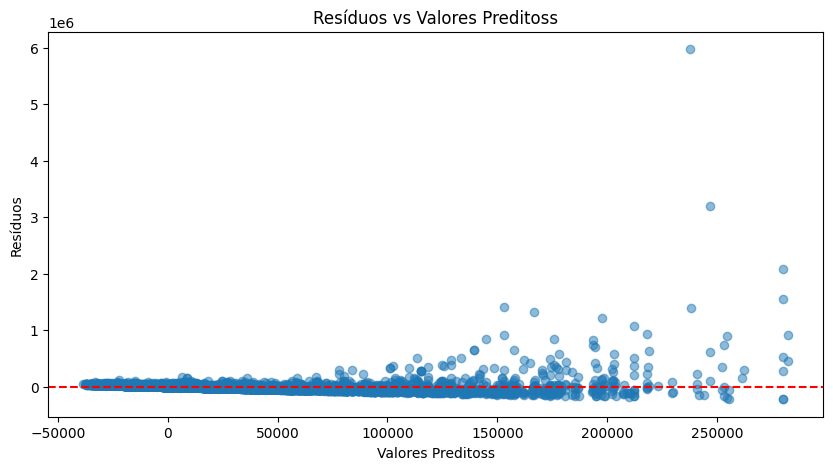

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(predicted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Preditoss')
plt.xlabel('Valores Preditoss')
plt.ylabel('Resíduos')
plt.show()

# Avaliar a relação dos resíduos com outras variáveis do modelo

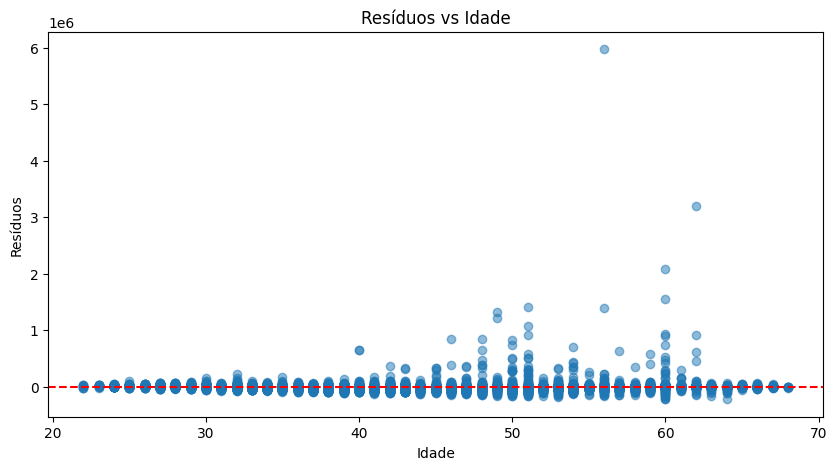

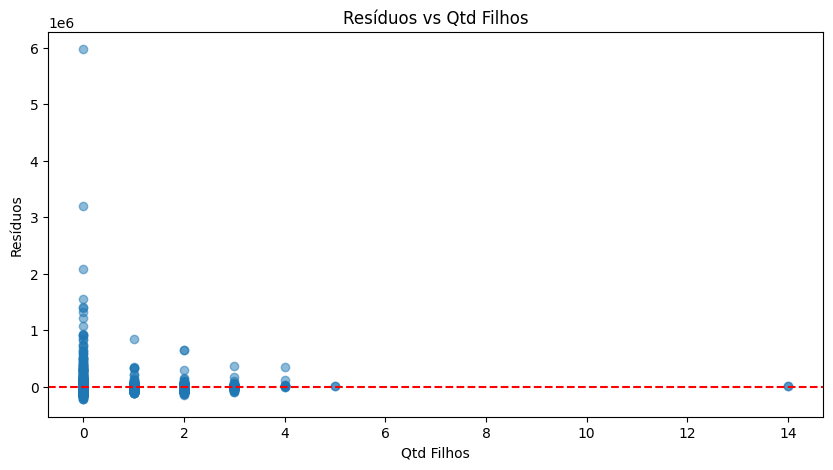

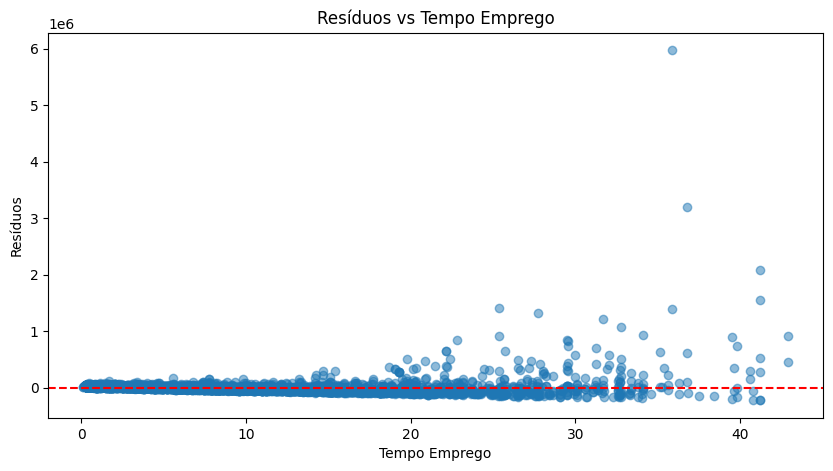

In [14]:
# Gráfico dos resíduos vs idade
plt.figure(figsize=(10, 5))
plt.scatter(df['idade'], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Idade')
plt.xlabel('Idade')
plt.ylabel('Resíduos')
plt.show()

# Gráfico dos resíduos vs qtd_filhos
plt.figure(figsize=(10, 5))
plt.scatter(df['qtd_filhos'], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Qtd Filhos')
plt.xlabel('Qtd Filhos')
plt.ylabel('Resíduos')
plt.show()

# Gráfico dos resíduos vs tempo_emprego
plt.figure(figsize=(10, 5))
plt.scatter(df['tempo_emprego'], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Tempo Emprego')
plt.xlabel('Tempo Emprego')
plt.ylabel('Resíduos')
plt.show()

Há um padrão residual em algumas variáveis

# Avaliar se o valor médio dos resíduos aparenta ter relação com o mês de referência

In [20]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [21]:
df['residuals'] = residuals
df['month'] = df['data_ref'].dt.to_period('M')
df.groupby('month')['residuals'].mean()

month
2015-01   -15821.232971
2015-02   -11460.116672
2015-03    -9083.767562
2015-04     3685.278230
2015-05     7480.981402
2015-06    17651.899593
2015-07    28114.009153
2015-08    31380.503076
2015-09    14329.373568
2015-10      494.939045
2015-11    -8078.370439
2015-12   -10790.263838
2016-01   -18565.777921
2016-02   -18103.055329
2016-03   -19006.540253
Freq: M, Name: residuals, dtype: float64

Resposta: Sim, o valor médio dos resíduos tem uma variância em relação ao mês de referência. Perrcebe-se que que o valor do resíduo foi negativo no início e fim de ano, enquanto os meses do meio do ano tiveram um valor de resíduo positivo

# Avaliar se a variância da variável resposta parece ser conforme os valores previstos


In [16]:
# Teste de Breusch-Pagan
test = sms.het_breuschpagan(residuals, model.model.exog)
print(f'Breusch-Pagan test: {test[0]}, p-value {test[1]}')

Breusch-Pagan test: 111.29301317705287, p-value 1.0735542620742528e-10



## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

In [22]:
influence = model.get_influence()
studentized_residuals = influence.resid_studentized_internal

In [23]:
outliers = np.where(np.abs(studentized_residuals) > 2)[0]

In [24]:
cooks_d = influence.cooks_distance[0]

In [25]:
influential_points = np.where(cooks_d > 1)[0]

In [27]:
print(f'Outliers (studentized residuals > 2): {len(outliers)}')
print(f'Pontos influentes (Cook\'s distance > 1): {len(influential_points)}')

Outliers (studentized residuals > 2): 85
Pontos influentes (Cook's distance > 1): 0


## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [35]:
corr = df.select_dtypes(include=['int64', 'float64']).drop(columns='index')

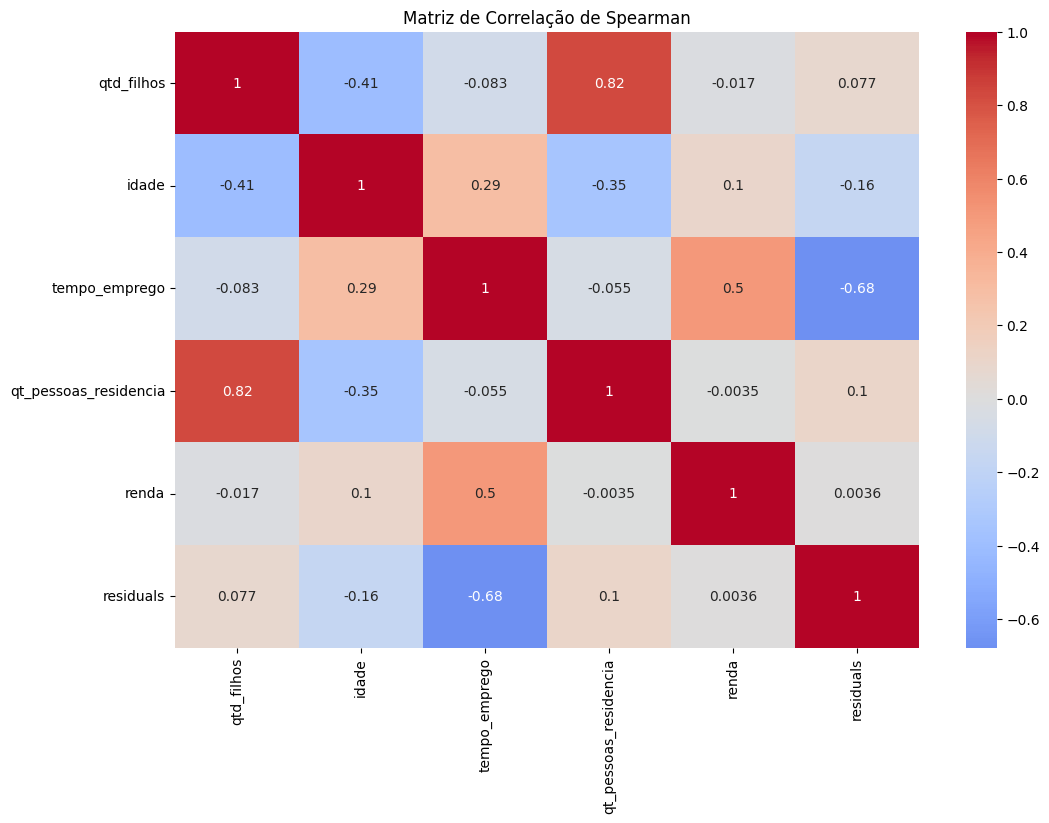

In [36]:
spearman_corr = corr.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação de Spearman')
plt.show()

In [39]:
X = df[['idade', 'qtd_filhos', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]

In [40]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [41]:
vif_data

,feature,VIF
0,idade,10.377247
1,qtd_filhos,5.246505
2,tempo_emprego,3.312176
3,qt_pessoas_residencia,17.481482
4,renda,1.276350


## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
df = pd.read_csv("/content/previsao_de_renda_II.csv").dropna()

In [53]:
X = pd.get_dummies(df.drop(columns=['renda', 'data_ref']))
y = df['renda']
for col in X.select_dtypes(include=['bool']).columns:
    X[col] = X[col].astype(int)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model_original = LinearRegression()
model_original.fit(X_train, y_train)

LinearRegression()

In [57]:
# Remover colunas com VIF > 5
X_train_adjusted = X_train.drop(columns=['idade', 'qtd_filhos', 'qt_pessoas_residencia'])
X_test_adjusted = X_test.drop(columns=['idade', 'qtd_filhos', 'qt_pessoas_residencia'])

In [58]:
model_adjusted = LinearRegression()
model_adjusted.fit(X_train_adjusted, y_train)

LinearRegression()

In [61]:
y_pred_original = model_original.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred_original)
r2_original = r2_score(y_test, y_pred_original)

In [62]:
y_pred_adjusted = model_adjusted.predict(X_test_adjusted)
mse_adjusted = mean_squared_error(y_test, y_pred_adjusted)
r2_adjusted = r2_score(y_test, y_pred_adjusted)

In [63]:
print(f'Modelo Original - MSE: {mse_original}, R²: {r2_original}')
print(f'Modelo Ajustado - MSE: {mse_adjusted}, R²: {r2_adjusted}')

Modelo Original - MSE: 8078691432.089605, R²: 0.21067563277341395
Modelo Ajustado - MSE: 8086461525.658726, R²: 0.20991645980074958
